## Calculating bond orientational order parameters

This example illustrates the calculation of bond orientational order parameters. Bond order parameters, $q_l$ and their averaged versions, $\bar{q}_l$ are widely used to  identify atoms belong to different crystal structures. In this example, we will consider bcc, fcc, and hcp, and calculate the $q_4$ and $q_6$ parameters and their averaged versions which are widely used in literature. More details can be found [here](https://pyscal.readthedocs.io/en/latest/steinhardtparameters.html). 

In [1]:
import pyscal.core as pc
import pyscal.crystal_structures as pcs
import numpy as np
import matplotlib.pyplot as plt

In this example, we analyse MD configurations, first a set of perfect bcc, fcc and hcp structures and another set with thermal vibrations.

### Perfect structures

To create atoms and box for perfect structures, the :mod:`~pyscal.crystal_structures` module is used. The created atoms and boxes are then assigned to `System` objects.

In [2]:
bcc_atoms, bcc_box = pcs.make_crystal('bcc', lattice_constant=3.147, repetitions=[4,4,4])
bcc = pc.System()
bcc.atoms = bcc_atoms
bcc.box = bcc_box

In [3]:
fcc_atoms, fcc_box = pcs.make_crystal('fcc', lattice_constant=3.147, repetitions=[4,4,4])
fcc = pc.System()
fcc.atoms = fcc_atoms
fcc.box = fcc_box

In [4]:
hcp_atoms, hcp_box = pcs.make_crystal('hcp', lattice_constant=3.147, repetitions=[4,4,4])
hcp = pc.System()
hcp.atoms = hcp_atoms
hcp.box = hcp_box

Next step is calculation of nearest neighbors. There are two ways to calculate neighbors, by using a cutoff distance or by using the voronoi cells. In this example, we will use the cutoff method and provide a cutoff distance for each structure.

#### Finding the cutoff distance

The cutoff distance is normally calculated in a such a way that the atoms within the first shell is incorporated in this distance. The :func:`pyscal.core.System.calculate_rdf` function can be used to find this cutoff distance.

In [5]:
bccrdf = bcc.calculate_rdf()
fccrdf = fcc.calculate_rdf()
hcprdf = hcp.calculate_rdf()

Now the calculated rdf is plotted

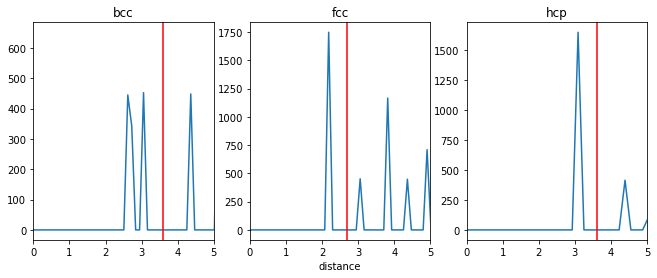

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(11,4))
ax1.plot(bccrdf[1], bccrdf[0])
ax2.plot(fccrdf[1], fccrdf[0])
ax3.plot(hcprdf[1], hcprdf[0])
ax1.set_xlim(0,5)
ax2.set_xlim(0,5)
ax3.set_xlim(0,5)
ax1.set_title('bcc')
ax2.set_title('fcc')
ax3.set_title('hcp')
ax2.set_xlabel("distance")
ax1.axvline(3.6, color='red')
ax2.axvline(2.7, color='red')
ax3.axvline(3.6, color='red')

The selected cutoff distances are marked in red in the above plot. For bcc, since the first two shells are close to each other, for this example, we will take the cutoff in such a way that both shells are included.

#### Steinhardt's parameters - cutoff neighbor method

In [7]:
bcc.find_neighbors(method='cutoff', cutoff=3.6)
fcc.find_neighbors(method='cutoff', cutoff=2.7)
hcp.find_neighbors(method='cutoff', cutoff=3.6)

We have used a cutoff of 3 here, but this is a parameter that has to be tuned. Using a different cutoff for each structure is possible, but it would complicate the method if the system has a mix of structures. Now we can calculate the $q_4$ and $q_6$ distributions 

In [8]:
bcc.calculate_q([4,6])
fcc.calculate_q([4,6])
hcp.calculate_q([4,6])

Thats it! Now lets gather the results and plot them.

In [9]:
bccq = bcc.get_qvals([4, 6])
fccq = fcc.get_qvals([4, 6])
hcpq = hcp.get_qvals([4, 6])

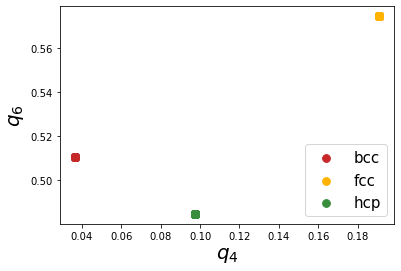

In [10]:
plt.scatter(bccq[0], bccq[1], s=60, label='bcc', color='#C62828')
plt.scatter(fccq[0], fccq[1], s=60, label='fcc', color='#FFB300')
plt.scatter(hcpq[0], hcpq[1], s=60, label='hcp', color='#388E3C')
plt.xlabel("$q_4$", fontsize=20)
plt.ylabel("$q_6$", fontsize=20)
plt.legend(loc=4, fontsize=15)

Firstly, we can see that Steinhardt parameter values of all the atoms fall on one specific point which is due to the absence of thermal vibrations. Next, all the points are well separated and show good distinction. However, at finite temperatures, the atomic positions are affected by thermal vibrations and hence show a spread in the distribution. We will show the effect of thermal vibrations in the next example. 

### Structures with thermal vibrations

Once again, we create the reqd structures using the :mod:`~pyscal.crystal_structures` module. Noise can be applied to atomic positions using the `noise` keyword as shown below.

In [18]:
bcc_atoms, bcc_box = pcs.make_crystal('bcc', lattice_constant=3.147, repetitions=[10,10,10], noise=0.1)
bcc = pc.System()
bcc.atoms = bcc_atoms
bcc.box = bcc_box

In [19]:
fcc_atoms, fcc_box = pcs.make_crystal('fcc', lattice_constant=3.147, repetitions=[10,10,10], noise=0.1)
fcc = pc.System()
fcc.atoms = fcc_atoms
fcc.box = fcc_box

In [20]:
hcp_atoms, hcp_box = pcs.make_crystal('hcp', lattice_constant=3.147, repetitions=[10,10,10], noise=0.1)
hcp = pc.System()
hcp.atoms = hcp_atoms
hcp.box = hcp_box

#### cutoff method

In [21]:
bcc.find_neighbors(method='cutoff', cutoff=3.6)
fcc.find_neighbors(method='cutoff', cutoff=2.7)
hcp.find_neighbors(method='cutoff', cutoff=3.6)

And now, calculate $q_4$, $q_6$ parameters

In [22]:
bcc.calculate_q([4,6])
fcc.calculate_q([4,6])
hcp.calculate_q([4,6])

Gather the q vales and plot them

In [23]:
bccq = bcc.get_qvals([4, 6])
fccq = fcc.get_qvals([4, 6])
hcpq = hcp.get_qvals([4, 6])

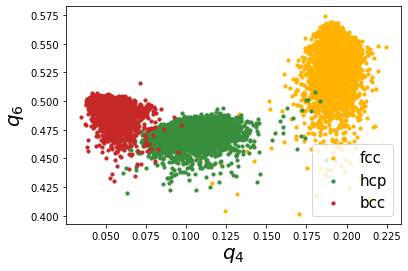

In [24]:
plt.scatter(fccq[0], fccq[1], s=10, label='fcc', color='#FFB300')
plt.scatter(hcpq[0], hcpq[1], s=10, label='hcp', color='#388E3C')
plt.scatter(bccq[0], bccq[1], s=10, label='bcc', color='#C62828')
plt.xlabel("$q_4$", fontsize=20)
plt.ylabel("$q_6$", fontsize=20)
plt.legend(loc=4, fontsize=15)

The thermal vibrations cause the distributions to spread, but it still very good. Lechner and Dellago proposed using the averaged distributions, $\bar{q}_4-\bar{q}_6$ to better distinguish the distributions. Lets try that. 

In [25]:
bcc.calculate_q([4,6], averaged=True)
fcc.calculate_q([4,6], averaged=True)
hcp.calculate_q([4,6], averaged=True)

In [26]:
bccaq = bcc.get_qvals([4, 6], averaged=True)
fccaq = fcc.get_qvals([4, 6], averaged=True)
hcpaq = hcp.get_qvals([4, 6], averaged=True)

Lets see if these distributions are better..

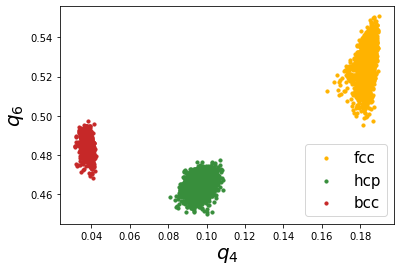

In [27]:
plt.scatter(fccaq[0], fccaq[1], s=10, label='fcc', color='#FFB300')
plt.scatter(hcpaq[0], hcpaq[1], s=10, label='hcp', color='#388E3C')
plt.scatter(bccaq[0], bccaq[1], s=10, label='bcc', color='#C62828')
plt.xlabel("$q_4$", fontsize=20)
plt.ylabel("$q_6$", fontsize=20)
plt.legend(loc=4, fontsize=15)

This looks much better! We can see that the resolution is much better than the non averaged versions.

There is also the possibility to calculate structures using Voronoi based neighbor identification too. Let's try that now.

In [28]:
bcc.find_neighbors(method='voronoi')
fcc.find_neighbors(method='voronoi')
hcp.find_neighbors(method='voronoi')

In [29]:
bcc.calculate_q([4,6], averaged=True)
fcc.calculate_q([4,6], averaged=True)
hcp.calculate_q([4,6], averaged=True)

In [30]:
bccaq = bcc.get_qvals([4, 6], averaged=True)
fccaq = fcc.get_qvals([4, 6], averaged=True)
hcpaq = hcp.get_qvals([4, 6], averaged=True)

Plot the calculated points..

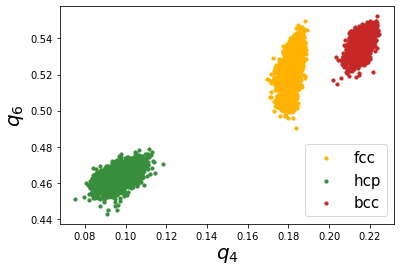

In [31]:
plt.scatter(fccaq[0], fccaq[1], s=10, label='fcc', color='#FFB300')
plt.scatter(hcpaq[0], hcpaq[1], s=10, label='hcp', color='#388E3C')
plt.scatter(bccaq[0], bccaq[1], s=10, label='bcc', color='#C62828')
plt.xlabel("$q_4$", fontsize=20)
plt.ylabel("$q_6$", fontsize=20)
plt.legend(loc=4, fontsize=15)

Voronoi based method also provides good resolution,the major difference being that the location of bcc distribution is different.